In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from cmdstanpy import CmdStanModel

In [2]:
F = len('Radosław')
L = len('Suliński')
N = 100*(L+F)

In [3]:
data = {'N': N}
model1 = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
sample1 = model1.sample(data=data, chains=1, iter_warmup=1000, iter_sampling=1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [10]:
model2 = CmdStanModel(stan_file='code_2.stan')
sample2 = model2.sample(data=data, chains=1, iter_warmup=1000, iter_sampling=1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [11]:
y1 = sample1.stan_variable('y').flatten()

(array([1.00e+00, 0.00e+00, 2.38e+02, 1.35e+03, 1.00e+00, 3.00e+00,
        1.00e+00, 3.00e+00, 0.00e+00, 3.00e+00]),
 array([-15.888  , -10.93741,  -5.98682,  -1.03623,   3.91436,   8.86495,
         13.81554,  18.76613,  23.71672,  28.66731,  33.6179 ]),
 <BarContainer object of 10 artists>)

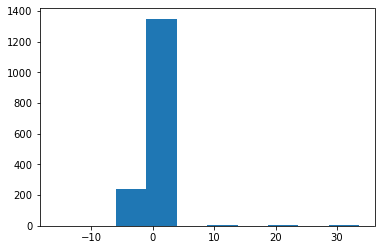

In [12]:
plt.hist(y1)

In [14]:
model3 = CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [15]:
model4 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [16]:
data = {'N' : N, 'y' : y1}


In [28]:
fit3 = model3.sample(data=data, chains=1, iter_warmup=1000, iter_sampling=1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [29]:
print(fit3.stan_variable('sigma'))
print(fit3.stan_variable('mu'))

[2.09425]
[0.115586]


In [30]:
fit4 = model4.sample(data=data, chains=1, iter_warmup=1000, iter_sampling=1)
print(fit4.stan_variable('sigma'))
print(fit4.stan_variable('mu'))
print(fit4.stan_variable('nu'))

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



[0.80185]
[0.0158002]
[3.97266]


In [41]:
y3 = fit3.stan_variable('y_hat')
ll3 = fit4.stan_variable('log_lik')
y4 = fit4.stan_variable('y_hat')
ll4 = fit4.stan_variable('log_lik')

In [48]:
compare_dict = {'normal': az.InferenceData(fit_wrap3), 'student': fit_wrap4}
az.compare(compare_dict)

C:\Users\Data\anaconda3\envs\DataAnalytics\lib\site-packages\arviz\stats\stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(


TypeError: log likelihood not found in inference data object

In [45]:
y3

array([[-0.393083, -1.48551 , -1.92428 , ..., -2.64742 ,  1.27263 ,
        -1.86671 ]])